In [1]:
%run get_data.ipynb
import simfin as sf
from simfin.names import *
import fredpy as fp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Check if your simfin version is '0.6.0'
print('simfin version:', sf.__version__)

simfin version: 0.6.0


In [3]:
# Set API-key for FRED datasets (free)
fp.api_key = '96aa5f33f8071171250dc08b9033068b'

# Set API-key for Simfin datasets (premium)
sf.set_api_key(api_key="WyVArak5g7xME876IyqO9E7ektABIsC8")

## Load financial data and share prices from SimFin

In [4]:
# Set the local directory where data-files are stored.
# The directory wll be created if it does not already exist.
sf.set_data_dir('~/JupyterNotebook/ML Stock Prediction/simfin_data/')

# Then, download the data from the SimFin server and load into a Pandas DataFrame.

**1. Income Statements**

It evaluates the revenues, expenses, gains, and losses of the organization through a particular period. It provides detailed about sales, which then helps in the computation of net income and earnings per share. It provides an overview of the net profit realized by the organization by equating net income to total revenue and gains less total expenses and losses. It provides insights into the company's operations and efficiency in different sectors of the organization as compared to other businesses or industries.

In [5]:
# Note: TTM is a finance term that stands for trailing twelve months. 
# It represents a company’s financials in the last 12 consecutive months.
# For example, let’s say thaat the latest report was for the third quarter (Q3). 
# Then you can calculate the TTM numbers by adding them up from Q4 last year and Q1, Q2, and Q3 this year.

# Load the income statement dataset
df_income_qrt = sf.load_income(variant='quarterly', market='us', refresh_days=30)
df_income_ttm = sf.load_income(variant='ttm', market='us', refresh_days=30)

Dataset "us-income-quarterly" on disk (12 days old).
- Loading from disk ... Done!
Dataset "us-income-ttm" on disk (12 days old).
- Loading from disk ... Done!


**2. Balance Sheets**

Balance sheets are a financial statements that gives reports on both short and long term liabilities and assets, and the equity of the share holds. It helps the organization, shareholders, and stakeholders to determine the liquidity of the company. It compares the assets and liabilities to determine the liquidity whereby if the assets are more than the liabilities the company is said to be liquid. It is used together with other income statements to determine its assets. Total assets are required to liabilities and capital (shareholders' equity). It uses the liquidity ratio to determine the determined ability to pay currents debts.

In [6]:
# Load the balance sheet dataset
df_balance_qrt = sf.load_balance(variant='quarterly', market='us', refresh_days=30)
df_balance_ttm = sf.load_balance(variant='ttm', market='us', refresh_days=30)

Dataset "us-balance-quarterly" on disk (12 days old).
- Loading from disk ... Done!
Dataset "us-balance-ttm" on disk (12 days old).
- Loading from disk ... Done!


**3. Cashflow Statements**

Cash flow summarizes the cash inwards and cash outwards of the enterprise. It determines how much is being generated and used in a particular period. It is used by investors to determine and understand the operational, investment, and financial activity of the organization.

In [7]:
# Load the cashflow dataset
df_cashflow_qrt = sf.load_cashflow(variant='quarterly', market='us', refresh_days=30)
df_cashflow_ttm = sf.load_cashflow(variant='ttm', market='us', refresh_days=30)

Dataset "us-cashflow-quarterly" on disk (12 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-ttm" on disk (12 days old).
- Loading from disk ... Done!


**4. General Information**

It provides the information of the company such as sector, industry, currency, and company name.

In [8]:
df_info = pd.merge(sf.load_companies(market='us',refresh_days=30),
                   sf.load_industries(refresh_days=30),
                   on = 'IndustryId',
                   how = 'left')

Dataset "us-companies" on disk (12 days old).
- Loading from disk ... Done!
Dataset "industries" on disk (12 days old).
- Loading from disk ... Done!


**5. Share Prices**

It includes the daily historical stock prices and volumes for each stock

In [9]:
# Load share prices dataset
df_share_prices = sf.load_shareprices(variant='daily', market='us',refresh_days=30)

Dataset "us-shareprices-daily" on disk (12 days old).
- Loading from disk ... Done!


In [10]:
# Drop any rows with missing values in share prices (except 'Dividend' as most companies don't pay dividends)
_before = len(df_share_prices)
df_share_prices = df_share_prices.dropna(subset=['SimFinId', 'Open', 'Low', 'High', 'Close', 'Adj. Close', 'Volume'])
_after = len(df_share_prices)
print('Dropped: ', _before-_after, ' (', round((_before-_after)/_before,4)*100, '%) ', sep='')

Dropped: 88192 (1.53%) 


In [11]:
df_balance_qrt

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2014-01-31      45846      USD         2014            Q1   2014-03-05   
       2014-04-30      45846      USD         2014            Q2   2014-06-04   
       2014-07-31      45846      USD         2014            Q3   2014-09-02   
       2014-10-31      45846      USD         2014            Q4   2014-12-22   
       2015-01-31      45846      USD         2015            Q1   2015-03-10   
...                      ...      ...          ...           ...          ...   
low    2019-02-28     186050      USD         2018            Q4   2019-03-23   
       2019-05-31     186050      USD         2019            Q1   2019-06-03   
       2019-08-31     186050      USD         2019            Q2   2019-09-03   
       2019-11-30     186050      USD         2019            Q3   2019-12-04   
       2020-02-29     186050      USD         2019            Q4   2020-03-23   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2014-01-31     2014-03-05     333000000.0       338000000.0   
       2014-04-30     2014-06-04     333000000.0       337000000.0   
       2014-07-31     2014-09-02     334000000.0       338000000.0   
       2014-10-31     2015-12-21     332000000.0       339000000.0   
       2015-01-31     2015-03-10     336000000.0       338000000.0   
...                          ...             ...               ...   
low    2019-02-28     2019-09-03     800000000.0       801000000.0   
       2019-05-31     2019-06-03     796000000.0       797000000.0   
       2019-08-31     2019-09-03     781000000.0       781000000.0   
       2019-11-30     2019-12-04     769000000.0       770000000.0   
       2020-02-29     2020-03-23     762000000.0       764000000.0   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Report Date                                                    
A      2014-01-31                                      2.742000e+09   
       2014-04-30                                      2.950000e+09   
       2014-07-31                                      2.391000e+09   
       2014-10-31                                      2.218000e+09   
       2015-01-31                                      2.118000e+09   
...                                                             ...   
low    2019-02-28                                      7.290000e+08   
       2019-05-31                                      3.163000e+09   
       2019-08-31                                      2.071000e+09   
       2019-11-30                                      9.210000e+08   
       2020-02-29                                      8.760000e+08   

                    Accounts & Notes Receivable  ...  Short Term Debt  \
Ticker Report Date                               ...                    
A      2014-01-31                   849000000.0  ...              NaN   
       2014-04-30                   903000000.0  ...              NaN   
       2014-07-31                   891000000.0  ...     3.500000e+07   
       2014-10-31                   626000000.0  ...              NaN   
       2015-01-31                   615000000.0  ...              NaN   
...                                         ...  ...              ...   
low    2019-02-28                           NaN  ...     1.832000e+09   
       2019-05-31                           NaN  ...     1.008000e+09   
       2019-08-31                           NaN  ...     1.009000e+09   
       2019-11-30                           NaN  ...     1.211000e+09   
       2020-02-29                           NaN  ...     2.538000e+09   

                    Total Current Liabilities  Long Term Debt  \
Ticker Report Date                                              
A      2014-01-31                1.549000e+09    2.

In [12]:
df_cashflow_qrt

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2014-01-31      45846      USD         2014            Q1   2014-03-05   
       2014-04-30      45846      USD         2014            Q2   2014-06-04   
       2014-07-31      45846      USD         2014            Q3   2014-09-02   
       2014-10-31      45846      USD         2014            Q4   2014-12-22   
       2015-01-31      45846      USD         2015            Q1   2015-03-10   
...                      ...      ...          ...           ...          ...   
low    2019-02-28     186050      USD         2018            Q4   2019-03-23   
       2019-05-31     186050      USD         2019            Q1   2019-06-03   
       2019-08-31     186050      USD         2019            Q2   2019-09-03   
       2019-11-30     186050      USD         2019            Q3   2019-12-04   
       2020-02-29     186050      USD         2019            Q4   2020-03-23   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2014-01-31     2015-03-10     333000000.0       338000000.0   
       2014-04-30     2015-06-05     333000000.0       337000000.0   
       2014-07-31     2015-09-02     334000000.0       338000000.0   
       2014-10-31     2016-12-20     332000000.0       339000000.0   
       2015-01-31     2016-03-08     336000000.0       338000000.0   
...                          ...             ...               ...   
low    2019-02-28     2019-03-23     800000000.0       801000000.0   
       2019-05-31     2019-06-03     796000000.0       797000000.0   
       2019-08-31     2019-09-03     781000000.0       781000000.0   
       2019-11-30     2019-12-04     769000000.0       770000000.0   
       2020-02-29     2020-03-23     762000000.0       764000000.0   

                    Net Income/Starting Line  Depreciation & Amortization  \
Ticker Report Date                                                          
A      2014-01-31               1.950000e+08                   96000000.0   
       2014-04-30               1.390000e+08                   97000000.0   
       2014-07-31               1.470000e+08                   98000000.0   
       2014-10-31               6.800000e+07                   93000000.0   
       2015-01-31               6.300000e+07                   68000000.0   
...                                      ...                          ...   
low    2019-02-28              -8.240000e+08                  401000000.0   
       2019-05-31               1.046000e+09                  337000000.0   
       2019-08-31               1.676000e+09                  347000000.0   
       2019-11-30               1.049000e+09                  345000000.0   
       2020-02-29               5.100000e+08                  381000000.0   

                    ...  Net Cash from Operating Activities  \
Ticker Report Date  ...                                       
A      2014-01-31   ...                        1.940000e+08   
       2014-04-30   ...                        3.250000e+08   
       2014-07-31   ...                        2.800000e+07   
       2014-10-31   ...                        1.840000e+08   
       2015-01-31   ...                       -2.000000e+07   
...                 ...                                 ...   
low    2019-02-28   ...                       -6.050000e+08   
       2019-05-31   ...                        2.137000e+09   
       2019-08-31   ...                        1.446000e+09   
       2019-11-30   ...                        5.280000e+08   
       2020-02-29   ...                        1.850000e+08   

                    Change in Fixed Assets & Intangibles  \
Ticker Report Date                                         
A      2014-01-31                            -45000000.0   
       2014-04-30                            -5100000

In [13]:
df_income_qrt

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2014-01-31      45846      USD         2014            Q1   2014-03-05   
       2014-04-30      45846      USD         2014            Q2   2014-06-04   
       2014-07-31      45846      USD         2014            Q3   2014-09-02   
       2014-10-31      45846      USD         2014            Q4   2014-12-22   
       2015-01-31      45846      USD         2015            Q1   2015-03-10   
...                      ...      ...          ...           ...          ...   
low    2019-02-28     186050      USD         2018            Q4   2019-03-23   
       2019-05-31     186050      USD         2019            Q1   2019-06-03   
       2019-08-31     186050      USD         2019            Q2   2019-09-03   
       2019-11-30     186050      USD         2019            Q3   2019-12-04   
       2020-02-29     186050      USD         2019            Q4   2020-03-23   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2014-01-31     2015-03-10     333000000.0       338000000.0   
       2014-04-30     2015-06-05     333000000.0       337000000.0   
       2014-07-31     2015-09-02     334000000.0       338000000.0   
       2014-10-31     2016-12-20     332000000.0       339000000.0   
       2015-01-31     2016-03-08     336000000.0       338000000.0   
...                          ...             ...               ...   
low    2019-02-28     2019-03-23     800000000.0       801000000.0   
       2019-05-31     2019-06-03     796000000.0       797000000.0   
       2019-08-31     2019-09-03     781000000.0       781000000.0   
       2019-11-30     2019-12-04     769000000.0       770000000.0   
       2020-02-29     2020-03-23     762000000.0       764000000.0   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
A      2014-01-31   1.008000e+09    -4.980000e+08  ...   
       2014-04-30   9.880000e+08    -5.030000e+08  ...   
       2014-07-31   1.009000e+09    -5.070000e+08  ...   
       2014-10-31   1.043000e+09    -5.640000e+08  ...   
       2015-01-31   1.026000e+09    -5.130000e+08  ...   
...                          ...              ...  ...   
low    2019-02-28   1.564600e+10    -1.160900e+10  ...   
       2019-05-31   1.774100e+10    -1.216000e+10  ...   
       2019-08-31   2.099200e+10    -1.425200e+10  ...   
       2019-11-30   1.738800e+10    -1.174800e+10  ...   
       2020-02-29   1.602700e+10    -1.104500e+10  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2014-01-31                   -27000000.0            -27000000.0   
       2014-04-30                   -25000000.0            -28000000.0   
       2014-07-31                   -46000000.0            -25000000.0   
       2014-10-31                   -92000000.0            -21000000.0   
       2015-01-31                    -2000000.0            -14000000.0   
...                                         ...                    ...   
low    2019-02-28                  -158000000.0           -158000000.0   
       2019-05-31                  -162000000.0           -162000000.0   
       2019-08-31                  -169000000.0           -169000000.0   
       2019-11-30                  -177000000.0           -177000000.0   
       2020-02-29                  -183000000.0           -183000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2014-01-31                     97000000                      NaN   
       2014-04-30                     69000000                      NaN   
       2014-07-31                    

In [14]:
df_share_prices

SimFinId    Open       Low     High   Close  Adj. Close  \
Ticker Date                                                                  
A      2007-01-03     45846   34.99   34.0500   35.480   34.30       22.85   
       2007-01-04     45846   34.30   33.4600   34.600   34.41       22.92   
       2007-01-05     45846   34.30   34.0000   34.400   34.09       22.71   
       2007-01-08     45846   33.98   33.6800   34.080   33.97       22.63   
       2007-01-09     45846   34.08   33.6300   34.320   34.01       22.65   
...                     ...     ...       ...      ...     ...         ...   
low    2020-05-22    186050  121.00  119.0700  122.535  122.25      122.25   
       2020-05-26    186050  124.94  123.3358  125.840  123.59      123.59   
       2020-05-27    186050  125.31  123.2600  128.460  128.01      128.01   
       2020-05-28    186050  129.00  126.7100  131.400  128.12      128.12   
       2020-05-29    186050  128.10  127.6900  130.530  130.35      130.35   

                   Dividend   Volume  
Ticker Date                           
A      2007-01-03       NaN  2574600  
       2007-01-04       NaN  2073700  
       2007-01-05       NaN  2676600  
       2007-01-08       NaN  1557200  
       2007-01-09       NaN  1386200  
...                     ...      ...  
low    2020-05-22       NaN  6063492  
       2020-05-26       NaN  7683149  
       2020-05-27       NaN  7613403  
       2020-05-28       NaN  7983076  
       2020-05-29       NaN  7401587  

[5659350 rows x 8 columns]

In [15]:
df_info

,SimFinId,Company Name,IndustryId,Sector,Industry
0,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research
1,367153,Alcoa Corp,110004.0,Basic Materials,Metals & Mining
2,939324,"AAC Holdings, Inc.",106011.0,Healthcare,Health Care Providers
3,68568,American Airlines Group Inc.,100006.0,Industrials,Airlines
4,450021,ATLANTIC AMERICAN CORP,104004.0,Financial Services,Insurance - Life
...,...,...,...,...,...
2122,45730,Zumiez Inc,103002.0,Consumer Cyclical,Retail - Apparel & Specialty
2123,901866,Zovio Inc,102006.0,Consumer Defensive,Education
2124,901704,"Zynerba Pharmaceuticals, Inc.",106002.0,Healthcare,Biotechnology
2125,171401,ZYNEX INC,106004.0,Healthcare,Medical Devices


## Load Macroeconomic data from FRED
- **Unemployment Rate**
- **Real GDP Growth**
- **Consumer Price Index (CPI)**
- **Industrial Price Index (IPI)**
- **New Private Housing Units Authorized by Building Permits**
- **Consumer Sentiment**

In [16]:
# Load the macro data
df_macro = macro_data() # 1-period date-lag has been added inside the function (1 month for monthly data; 1 quarter for quarterly data)

In [17]:
df_macro.head()

,Unemployment Rate,Unemployment Rate Growth MOM,Unemployment Rate Growth QOQ,Unemployment Rate Growth YOY,CPI,CPI Growth MOM,CPI Growth QOQ,CPI Growth YOY,IPI,IPI Growth MOM,...,New Housing Permits Growth YOY,Consumer Sentiment,Consumer Sentiment Growth MOM,Consumer Sentiment Growth QOQ,Consumer Sentiment Growth YOY,Real GDP Growth QOQ,Real GDP Growth YOY,M2 Growth MOM,M2 Growth QOQ,M2 Growth YOY
Date,,,,,,,,,,,,,,,,,,,,,
1981-11,7.9,0.039474,0.097222,0.053333,93.4,0.003222,0.020765,0.102715,52.4949,-0.006745,...,-0.464861,70.3,-0.038304,-0.051282,-0.062667,0.011975,0.043258,0.007952,0.022974,0.087891
1981-12,8.3,0.050633,0.121622,0.106667,93.8,0.004283,0.017354,0.095794,51.8940,-0.011447,...,-0.459147,62.5,-0.110953,-0.190415,-0.185137,0.011975,0.043258,0.010653,0.027396,0.097418
1982-01,8.5,0.024096,0.118421,0.180556,94.1,0.003198,0.010741,0.089120,51.3274,-0.010918,...,-0.362690,64.3,0.028800,-0.120383,-0.003101,-0.010895,0.012999,0.006552,0.025364,0.099452
1982-02,8.6,0.011765,0.088608,0.146667,94.4,0.003188,0.010707,0.082569,50.3043,-0.019933,...,-0.349713,71.0,0.104199,0.009957,-0.005602,-0.010895,0.012999,0.004359,0.021709,0.095991
1982-03,8.9,0.034884,0.072289,0.202703,94.7,0.003178,0.009595,0.076136,51.3016,0.019825,...,-0.326105,66.5,-0.063380,0.064000,-0.005979,-0.010895,0.012999,0.008454,0.019486,0.090505


## Generate quarterly signals:

#### Report Date vs. Publish Date
- **Report Date** is the date of the financial report, but this is not the date when the report was published. For example, an annual report with a Report Date of 2018-12-31 means that the period of the financial report is the 12 months ending on that date.
- **Publish Date** is the date the financial report was made available to the public. For example, a financial report for the 12 months ending on 2018-12-31 may first have been made public a few months later e.g. on 2019-02-05.
- the **Report Date** is not when it was actually made available to the public, which can be 1, 2 or even 3 months after the **Report Date**.
- To ensure that our analysis only includes the exposed financial reports, we add a 3-month lag "**offset=pd.DateOffset(months=3)**" to the financial reports

### i) Financial Signals
Financial signals calculated from data in financial reports such as Income Statements and Balance Sheets, e.g. Net Profit Margin, Debt Ratio, and Return on Assets (ROA).

In [18]:
df_fin_signals = fin_signals(df_income_ttm=df_income_ttm,
                             df_balance_ttm=df_balance_ttm,
                             df_cashflow_ttm=df_cashflow_ttm,
                             fill_method='ffill', # ‘ffill’ stands for ‘forward fill’ 
                                                  # and will propagate last valid observation forward
                             offset=pd.DateOffset(months=3)) # 3-months time-lag

/Users/Daiii/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
df_fin_signals

(Dividends + Share Buyback) / FCF  Asset Turnover  \
Ticker Report Date                                                      
A      2011-07-30                            0.168927        0.711759   
       2011-10-31                            0.185950        0.738375   
       2012-01-31                            0.177064        0.730374   
       2012-04-30                            0.045863        0.739752   
       2012-07-30                            0.162579        0.721024   
...                                               ...             ...   
low    2019-05-28                            0.859274        2.066448   
       2019-08-31                            1.170789        1.658761   
       2019-11-30                            1.838699        1.764197   
       2020-02-29                            2.406729        1.804823   
       2020-05-29                            1.953950        1.827874   

                    CapEx / (Depr + Amor)  Current Ratio  Debt Ratio  \
Ticker Report Date                                                     
A      2011-07-30                0.590551       3.201005    0.247890   
       2011-10-31                0.603113       3.470432    0.247687   
       2012-01-31                0.671937       3.031573    0.241250   
       2012-04-30                0.706349       3.351906    0.239697   
       2012-07-30                0.658635       3.275204    0.231276   
...                                   ...            ...         ...   
low    2019-05-28                0.683261       0.981444    0.470123   
       2019-08-31                0.680796       1.087397    0.406071   
       2019-11-30                0.694156       1.060688    0.431183   
       2020-02-29                0.809790       1.039766    0.448798   
       2020-05-29                0.936879       1.008958    0.489119   

                    Dividends / FCF  Dummy_Dividends  Gross Profit Margin  \
Ticker Report Date                                                          
A      2011-07-30         -0.000000                0             0.532001   
       2011-10-31         -0.000000                0             0.532570   
       2012-01-31         -0.000000                0             0.533485   
       2012-04-30         -0.000000                0             0.532907   
       2012-07-30          0.031789                1             0.531163   
...                             ...              ...                  ...   
low    2019-05-28          0.285574                1             0.321250   
       2019-08-31          0.390523                1             0.313530   
       2019-11-30          0.528767                1             0.306683   
       2020-02-29          0.673765                1             0.306520   
       2020-05-29          0.543866                1             0.317999   

                    Interest Coverage  Inventory Turnover  Log Revenue  \
Ticker Report Date                                                       
A      2011-07-30           10.890411            7.216882     9.789299   
       2011-10-31           13.927536            7.205128     9.810434   
       2012-01-31           14.875000            7.366370     9.820530   
       2012-04-30           14.881579            7.183565     9.828080   
       2012-07-30           14.207317            7.166843     9.831678   
...                               ...                 ...          ...   
low    2019-05-28            6.439103            5.677016    10.853144   
       2019-08-31            6.341853            4.771063    10.855459   
       2019-11-30            6.523364            5.228988    10.856088   
       2020-02-29            7.190691            5.232356    10.855925   
       2020-05-29            9.137482            5.474467    10.858224   

                    Net Acquisitions / Total Assets  Net Profit Margin  \
Ticker Report Date                                                       
A      2011-07-30   

### ii) Growth Signals
Growth signals are also calculated from the data in financial reports such as Income Statements, e.g. Sales Growth and Earnings Growth.

In [20]:
df_growth_signals = growth_signals(df_income_ttm=df_income_ttm,
                                      df_income_qrt=df_income_qrt,
                                      df_balance_ttm=df_balance_ttm,
                                      df_balance_qrt=df_balance_qrt,
                                      df_cashflow_ttm=df_cashflow_ttm,
                                      df_cashflow_qrt=df_cashflow_qrt,
                                      fill_method='ffill',
                                      offset=pd.DateOffset(months=3)) # 3-months time-lag

In [21]:
df_growth_signals

Assets Growth  Assets Growth QOQ  Assets Growth YOY  \
Ticker Report Date                                                        
A      2011-07-30             NaN                NaN                NaN   
       2011-10-31             NaN                NaN                NaN   
       2012-01-31             NaN                NaN                NaN   
       2012-04-30             NaN                NaN                NaN   
       2012-07-30        0.088334                NaN                NaN   
...                           ...                ...                ...   
low    2019-05-28       -0.022187          -0.060060          -0.022187   
       2019-08-31        0.130293           0.252434           0.130293   
       2019-11-30        0.096752          -0.058400           0.096752   
       2020-02-29        0.083104          -0.022878           0.083104   
       2020-05-29        0.143822          -0.007368           0.143822   

                    Earnings Growth  Earnings Growth QOQ  Earnings Growth YOY  \
Ticker Report Date                                                              
A      2011-07-30               NaN                  NaN                  NaN   
       2011-10-31               NaN                  NaN                  NaN   
       2012-01-31               NaN                  NaN                  NaN   
       2012-04-30               NaN                  NaN                  NaN   
       2012-07-30          0.240449                  NaN                  NaN   
...                             ...                  ...                  ...   
low    2019-05-28         -0.328692            -2.308426            -2.485560   
       2019-08-31         -0.381164            -2.270960             0.058704   
       2019-11-30         -0.357397             0.602294             0.102632   
       2020-02-29         -0.201300            -0.374105             0.667727   
       2020-05-29          0.850043            -0.513823            -1.619684   

                    FCF Growth  FCF Growth QOQ  FCF Growth YOY  Sales Growth  \
Ticker Report Date                                                             
A      2011-07-30          NaN             NaN             NaN           NaN   
       2011-10-31          NaN             NaN             NaN           NaN   
       2012-01-31          NaN             NaN             NaN           NaN   
       2012-04-30          NaN             NaN             NaN           NaN   
       2012-07-30     0.357583             NaN             NaN      0.102502   
...                        ...             ...             ...           ...   
low    2019-05-28     0.277903       -2.245879        0.465267      0.039202   
       2019-08-31    -0.062714       -3.156560       -0.390654      0.037197   
       2019-11-30    -0.372448       -0.415644       -0.446221      0.018181   
       2020-02-29    -0.563812       -0.863517       -0.785714      0.008573   
       2020-05-29    -0.416094       -2.794872       -0.691290      0.011766   

                    Sales Growth QOQ  Sales Growth YOY  
Ticker Report Date                                      
A      2011-07-30                NaN               NaN  
       2011-10-31                NaN               NaN  
       2012-01-31                NaN               NaN  
       2012-04-30                NaN               NaN  
       2012-07-30                NaN               NaN  
...                              ...               ...  
low    2019-05-28          -0.101579          0.009810  
       2019-08-31           0.133900          0.021947  
       2019-11-30           0.183248          0.004979  
       2020-02-29          -0.171684         -0.001550  
       2020-05-29          -0.078272          0.024351  

[56901 rows x 12 columns]

## Combine quarterly signals and macro data
- **financial signals**
- **growth signals**
- **macro indicators**

In [22]:
# Merge financial signals, growth signals, and other signals
dfs = [df_fin_signals, df_growth_signals]
df_merged_qrt = reduce(lambda left, right: pd.merge(left,right,left_index=True,right_index=True,how='inner'), dfs).reset_index()


# Create a Y-M report for linking quarterly macroeconomic data
df_merged_qrt.insert(loc = 2, # The location to insert the new column
                     column = 'Report Y-M', # New column name
                     value = df_merged_qrt['Report Date'].apply(lambda x: x.strftime('%Y-%m'))) # Take year and month as the value

# Merge with macro data
df_merged_qrt = pd.merge(df_merged_qrt,
                         df_macro,
                         left_on='Report Y-M', # Column name to join on in the left DataFrame # str or list
                         right_index=True,     # Use the index from the left DataFrame as the join key
                         how='left')           # how = 'left': use only keys from left frame
                                               #       'right': right: use only keys from right frame
                                               #       'outer': use union of keys from both frames
                                               #       'inner': use intersection of keys from both frames

# Get tickers and IDs of SimFin datasets
df_merged_qrt = pd.merge(df_merged_qrt,
                         df_balance_qrt.reset_index()[['Ticker', 'SimFinId']].drop_duplicates(),
                         left_on='Ticker',
                         right_on='Ticker',
                         how='left')

# Merge with general infomation dataset
df_merged_qrt = pd.merge(df_info,
                         df_merged_qrt,
                         on='SimFinId',
                         how='right')

# Move some columns to the front
columns = [i for i in df_merged_qrt.columns]
df_merged_qrt = df_merged_qrt[['Sector', 'Industry']+columns[5:8]+columns[8:]]

In [23]:
df_merged_qrt

,Sector,Industry,Ticker,Report Date,Report Y-M,(Dividends + Share Buyback) / FCF,Asset Turnover,CapEx / (Depr + Amor),Current Ratio,Debt Ratio,...,New Housing Permits Growth YOY,Consumer Sentiment,Consumer Sentiment Growth MOM,Consumer Sentiment Growth QOQ,Consumer Sentiment Growth YOY,Real GDP Growth QOQ,Real GDP Growth YOY,M2 Growth MOM,M2 Growth QOQ,M2 Growth YOY
0,Healthcare,Medical Diagnostics & Research,A,2011-07-30,2011-07,0.168927,0.711759,0.590551,3.201005,0.247890,...,0.083475,71.5,-0.037685,0.059259,-0.059211,0.007150,0.017215,0.017904,0.033053,0.077283
1,Healthcare,Medical Diagnostics & Research,A,2011-10-31,2011-10,0.185950,0.738375,0.603113,3.470432,0.247687,...,0.083481,59.5,0.066308,-0.167832,-0.127566,-0.000278,0.009490,0.003569,0.031629,0.093822
2,Healthcare,Medical Diagnostics & Research,A,2012-01-31,2012-01,0.177064,0.730374,0.671937,3.031573,0.241250,...,0.102848,69.9,0.097331,0.174790,-0.061745,0.011593,0.016093,0.009379,0.017678,0.102974
3,Healthcare,Medical Diagnostics & Research,A,2012-04-30,2012-04,0.045863,0.739752,0.706349,3.351906,0.239697,...,0.382504,76.2,0.011952,0.090129,0.128889,0.007830,0.026518,0.005976,0.013876,0.099617
4,Healthcare,Medical Diagnostics & Research,A,2012-07-30,2012-07,0.162579,0.721024,0.658635,3.275204,0.231276,...,0.248428,73.2,-0.076923,-0.039370,0.023776,0.004302,0.023615,0.007269,0.018552,0.084181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51540,NaN,NaN,XCRA,2017-01-31,2017-01,0.000000,0.876987,0.515133,4.751947,0.062796,...,0.034739,98.2,0.046908,0.076754,0.060475,0.005027,0.020341,0.007175,0.014470,0.067362
51541,NaN,NaN,XCRA,2017-04-30,2017-04,-0.000000,0.885969,0.550849,4.568899,0.060155,...,0.154602,96.9,0.006231,-0.013238,0.064835,0.005668,0.020984,0.003203,0.013037,0.062239
51542,NaN,NaN,XCRA,2017-07-30,2017-07,-0.000000,0.890440,0.784122,4.074244,0.055130,...,0.101329,95.0,-0.021627,-0.019608,0.016043,0.005344,0.021635,0.005704,0.012075,0.058327
51543,NaN,NaN,XCRA,2017-10-31,2017-10,-0.000000,0.890924,0.866074,3.611456,0.048621,...,-0.019501,95.1,-0.017562,0.001053,0.042763,0.007908,0.024160,0.004217,0.010074,0.050584


## Calculate Target Variables:

### i) Quarter over quarter stock returns and movements

In [24]:
# Add 'Close' price to the table
df_merged_qrt = pd.merge(df_merged_qrt,
                         reindex(df_src=df_share_prices,
                                 df_target=df_merged_qrt.set_index(['Ticker', 'Report Date']),
                                 method='ffill')[['Close']], # Reindex the shareprices to deal with the case
                                                             # that some report dates are on weekends
                                                             # (e.x. Friday's stock price will be applied to Saturaday and Sunday)
                         left_on=['Ticker','Report Date'],
                         right_on=['Ticker','Report Date'],
                         how='left').set_index(['Ticker','Report Date'])

In [25]:
df_merged_qrt

Sector                        Industry Report Y-M  \
Ticker Report Date                                                          
A      2011-07-30   Healthcare  Medical Diagnostics & Research    2011-07   
       2011-10-31   Healthcare  Medical Diagnostics & Research    2011-10   
       2012-01-31   Healthcare  Medical Diagnostics & Research    2012-01   
       2012-04-30   Healthcare  Medical Diagnostics & Research    2012-04   
       2012-07-30   Healthcare  Medical Diagnostics & Research    2012-07   
...                        ...                             ...        ...   
XCRA   2017-01-31          NaN                             NaN    2017-01   
       2017-04-30          NaN                             NaN    2017-04   
       2017-07-30          NaN                             NaN    2017-07   
       2017-10-31          NaN                             NaN    2017-10   
       2018-01-31          NaN                             NaN    2018-01   

                    (Dividends + Share Buyback) / FCF  Asset Turnover  \
Ticker Report Date                                                      
A      2011-07-30                            0.168927        0.711759   
       2011-10-31                            0.185950        0.738375   
       2012-01-31                            0.177064        0.730374   
       2012-04-30                            0.045863        0.739752   
       2012-07-30                            0.162579        0.721024   
...                                               ...             ...   
XCRA   2017-01-31                            0.000000        0.876987   
       2017-04-30                           -0.000000        0.885969   
       2017-07-30                           -0.000000        0.890440   
       2017-10-31                           -0.000000        0.890924   
       2018-01-31                           -0.000000        0.974704   

                    CapEx / (Depr + Amor)  Current Ratio  Debt Ratio  \
Ticker Report Date                                                     
A      2011-07-30                0.590551       3.201005    0.247890   
       2011-10-31                0.603113       3.470432    0.247687   
       2012-01-31                0.671937       3.031573    0.241250   
       2012-04-30                0.706349       3.351906    0.239697   
       2012-07-30                0.658635       3.275204    0.231276   
...                                   ...            ...         ...   
XCRA   2017-01-31                0.515133       4.751947    0.062796   
       2017-04-30                0.550849       4.568899    0.060155   
       2017-07-30                0.784122       4.074244    0.055130   
       2017-10-31                0.866074       3.611456    0.048621   
       2018-01-31                0.850096       4.267345    0.046692   

                    Dividends / FCF  Dummy_Dividends  ...  Consumer Sentiment  \
Ticker Report Date                                    ...                       
A      2011-07-30         -0.000000                0  ...                71.5   
       2011-10-31         -0.000000                0  ...                59.5   
       2012-01-31         -0.000000                0  ...                69.9   
       2012-04-30         -0.000000                0  ...                76.2   
       2012-07-30          0.031789                1  ...                73.2   
...                             ...              ...  ...                 ...   
XCRA   2017-01-31          0.000000                0  ...                98.2   
       2017-04-30         -0.000000                0  ...                96.9   
       2017-07-30         -0.000000                0  ...                95.0   
       2017-10-31         -0.000000                0  ...                95.1   
       2018-01-31         -0.000000                0  ...                95.9   

                    Consumer Sentiment Growth MOM  \
Ticker Report Date          

In [26]:
def calculate_return_qoq(df):
    df['Return QOQ'] = df['Close'].pct_change(1).shift(-1) # numeric variable: return of the stock from this quarter to the next quarter
    df['Moveup QOQ'] = (df['Return QOQ'] > 0).astype(int)  # boolean variable: 1 if the stock moves up, 0 otherwise
    return df

In [27]:
# Calculate quarter over quarter (QOQ) return and movements
df_merged_qrt = sf.apply(df=df_merged_qrt,
                         func=calculate_return_qoq).dropna(subset=['Return QOQ'])

In [28]:
# Move our target variables to the front of the table
columns = [i for i in df_merged_qrt.columns]
df_merged_qrt = df_merged_qrt[columns[-3:]+columns[:-3]].reset_index()

In [29]:
df_merged_qrt

,Ticker,Report Date,Close,Return QOQ,Moveup QOQ,Sector,Industry,Report Y-M,(Dividends + Share Buyback) / FCF,Asset Turnover,...,New Housing Permits Growth YOY,Consumer Sentiment,Consumer Sentiment Growth MOM,Consumer Sentiment Growth QOQ,Consumer Sentiment Growth YOY,Real GDP Growth QOQ,Real GDP Growth YOY,M2 Growth MOM,M2 Growth QOQ,M2 Growth YOY
0,A,2011-07-30,42.16,-0.120731,0,Healthcare,Medical Diagnostics & Research,2011-07,0.168927,0.711759,...,0.083475,71.5,-0.037685,0.059259,-0.059211,0.007150,0.017215,0.017904,0.033053,0.077283
1,A,2011-10-31,37.07,0.145670,1,Healthcare,Medical Diagnostics & Research,2011-10,0.185950,0.738375,...,0.083481,59.5,0.066308,-0.167832,-0.127566,-0.000278,0.009490,0.003569,0.031629,0.093822
2,A,2012-01-31,42.47,-0.006828,0,Healthcare,Medical Diagnostics & Research,2012-01,0.177064,0.730374,...,0.102848,69.9,0.097331,0.174790,-0.061745,0.011593,0.016093,0.009379,0.017678,0.102974
3,A,2012-04-30,42.18,-0.094832,0,Healthcare,Medical Diagnostics & Research,2012-04,0.045863,0.739752,...,0.382504,76.2,0.011952,0.090129,0.128889,0.007830,0.026518,0.005976,0.013876,0.099617
4,A,2012-07-30,38.18,-0.057360,0,Healthcare,Medical Diagnostics & Research,2012-07,0.162579,0.721024,...,0.248428,73.2,-0.076923,-0.039370,0.023776,0.004302,0.023615,0.007269,0.018552,0.084181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47785,low,2019-02-28,105.09,-0.125797,0,Consumer Cyclical,Retail - Apparel & Specialty,2019-02,0.728218,1.938196,...,-0.035897,91.2,-0.072228,-0.075051,-0.047022,0.002713,0.025165,0.001608,0.014773,0.040915
47786,low,2019-05-28,91.87,0.221291,1,Consumer Cyclical,Retail - Apparel & Specialty,2019-05,0.859274,2.066448,...,-0.041096,97.2,-0.012195,0.065789,-0.016194,0.007652,0.026522,0.007488,0.013831,0.042066
47787,low,2019-08-31,112.20,0.045544,1,Consumer Cyclical,Retail - Apparel & Specialty,2019-08,1.170789,1.658761,...,0.026296,98.4,0.002037,0.012346,0.005107,0.004997,0.022783,0.003491,0.018174,0.050737
47788,low,2019-11-30,117.31,-0.091552,0,Consumer Cyclical,Retail - Apparel & Specialty,2019-11,1.838699,1.764197,...,0.186267,95.5,0.024678,-0.029472,-0.031440,0.005218,0.020733,0.006250,0.022025,0.070577


In [30]:
# Check missing values in each column
df_merged_qrt_na = (df_merged_qrt.isnull().sum() / len(df_merged_qrt)) * 100
df_merged_qrt_na = df_merged_qrt_na.drop(df_merged_qrt_na[df_merged_qrt_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_merged_qrt_na})
missing_data.head(10)

,Missing Ratio
Net Acquisitions / Total Assets,67.861477
R&D / Revenue,63.588617
Return on Research Capital,63.569784
R&D / Gross Profit,63.569784
Debt Ratio,36.924043
Inventory Turnover,29.579410
Sales Growth,16.526470
FCF Growth,14.651601
Earnings Growth,14.643231
Assets Growth,14.643231


In [31]:
# Remove the columns with high missing ratio

threshold = 40 # Remove the column with high missing ratio

columns = [i for i in df_merged_qrt.columns]
columns_dropped = []
for col in missing_data.index:
    if missing_data.loc[col].values[0] > threshold:
        columns.remove(col)
        columns_dropped.append(col)
df_merged_qrt = df_merged_qrt[columns]
print('Drop columns:', columns_dropped)

Drop columns: ['Net Acquisitions / Total Assets', 'R&D / Revenue', 'Return on Research Capital', 'R&D / Gross Profit']


In [32]:
# Drop stocks with NaN on the column 'Sector' or 'Industry'
_rows_before = len(df_merged_qrt)
df_merged_qrt = df_merged_qrt.dropna(subset=['Sector', 'Industry'])
_rows_after = len(df_merged_qrt)
print('i) Number of rows dropped:', _rows_before-_rows_after)

# Drop negative infinity and infinity values
_rows_before = len(df_merged_qrt)
df_merged_qrt = df_merged_qrt.replace([np.inf, -np.inf], np.nan)
_rows_after = len(df_merged_qrt)
print('ii) Number of rows dropped:', _rows_before-_rows_after)

# Fill NaN by the sector median
for col in [i for i in df_merged_qrt.columns][8:]: # Features start at 9th column (index=8)
    df_merged_qrt[col] = df_merged_qrt.groupby(['Sector', 'Report Y-M'])[col].apply(lambda x: x.fillna(x.median())) 
                                                    # group by 'Secotr' and 'Report Y-M' # fill the NaN value by the group mean
    
# For the remaining NaN values, just drop the row
_rows_before = len(df_merged_qrt)
df_merged_qrt = df_merged_qrt.dropna().reset_index(drop=True) 
_rows_after = len(df_merged_qrt)
print('iii) Number of rows dropped:', _rows_before-_rows_after)

i) Number of rows dropped: 1363
ii) Number of rows dropped: 0


/Users/Daiii/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


iii) Number of rows dropped: 1255


In [33]:
# Check remainig missing values if any
df_merged_qrt_na = (df_merged_qrt.isnull().sum() / len(df_merged_qrt)) * 100
df_merged_qrt_na = df_merged_qrt_na.drop(df_merged_qrt_na[df_merged_qrt_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_merged_qrt_na})
missing_data.head()

,Missing Ratio


In [34]:
# Convert categorical variable 'Sector' to binary variables using one-hot-encoding
enc = OneHotEncoder(handle_unknown='ignore')
x_sector_df = pd.DataFrame(enc.fit_transform(df_merged_qrt[['Sector']]).toarray())
x_sector_df.columns = enc.get_feature_names()
x_sector_df

,x0_Basic Materials,x0_Business Services,x0_Consumer Cyclical,x0_Consumer Defensive,x0_Energy,x0_Financial Services,x0_Healthcare,x0_Industrials,x0_Real Estate,x0_Technology,x0_Utilities
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45169,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45170,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_merged_qrt = pd.concat([df_merged_qrt, x_sector_df], axis=1)
df_merged_qrt

,Ticker,Report Date,Close,Return QOQ,Moveup QOQ,Sector,Industry,Report Y-M,(Dividends + Share Buyback) / FCF,Asset Turnover,...,x0_Business Services,x0_Consumer Cyclical,x0_Consumer Defensive,x0_Energy,x0_Financial Services,x0_Healthcare,x0_Industrials,x0_Real Estate,x0_Technology,x0_Utilities
0,A,2011-07-30,42.16,-0.120731,0,Healthcare,Medical Diagnostics & Research,2011-07,0.168927,0.711759,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A,2011-10-31,37.07,0.145670,1,Healthcare,Medical Diagnostics & Research,2011-10,0.185950,0.738375,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,A,2012-01-31,42.47,-0.006828,0,Healthcare,Medical Diagnostics & Research,2012-01,0.177064,0.730374,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,A,2012-04-30,42.18,-0.094832,0,Healthcare,Medical Diagnostics & Research,2012-04,0.045863,0.739752,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,A,2012-07-30,38.18,-0.057360,0,Healthcare,Medical Diagnostics & Research,2012-07,0.162579,0.721024,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45167,low,2019-02-28,105.09,-0.125797,0,Consumer Cyclical,Retail - Apparel & Specialty,2019-02,0.728218,1.938196,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45168,low,2019-05-28,91.87,0.221291,1,Consumer Cyclical,Retail - Apparel & Specialty,2019-05,0.859274,2.066448,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45169,low,2019-08-31,112.20,0.045544,1,Consumer Cyclical,Retail - Apparel & Specialty,2019-08,1.170789,1.658761,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45170,low,2019-11-30,117.31,-0.091552,0,Consumer Cyclical,Retail - Apparel & Specialty,2019-11,1.838699,1.764197,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_merged_qrt.to_csv('merged quarterly data.csv')

## Generate Daily Signals

### i) Valuation Signals
Valuation signals are calculated from both the share-prices and data in the financial reports such as Income Statements and Balance Sheets, e.g. P/E and P/Sales ratios.

In [36]:
df_val_signals = val_signals(df_prices=df_share_prices,
                             df_income_ttm=df_income_ttm,
                             df_balance_ttm=df_balance_ttm,
                             df_cashflow_ttm=df_cashflow_ttm,
                             fill_method='ffill',
                             offset=pd.DateOffset(months=3))

In [37]:
df_val_signals

Dividend Yield  Earnings Yield  FCF Yield    Market-Cap  \
Ticker Date                                                                  
A      2007-01-03       -0.000000             NaN        NaN           NaN   
       2007-01-04       -0.000000             NaN        NaN           NaN   
       2007-01-05       -0.000000             NaN        NaN           NaN   
       2007-01-08       -0.000000             NaN        NaN           NaN   
       2007-01-09       -0.000000             NaN        NaN           NaN   
...                           ...             ...        ...           ...   
low    2020-05-22        0.016438        0.030631   0.024397  9.624131e+10   
       2020-05-26        0.016260        0.030299   0.024132  9.729623e+10   
       2020-05-27        0.015698        0.029253   0.023299  1.007759e+11   
       2020-05-28        0.015685        0.029228   0.023279  1.008625e+11   
       2020-05-29        0.015955        0.042214   0.029336  1.014123e+11   

                      P/Book      P/Cash        P/E      P/FCF    P/NCAV  \
Ticker Date                                                                
A      2007-01-03        NaN         NaN        NaN        NaN       NaN   
       2007-01-04        NaN         NaN        NaN        NaN       NaN   
       2007-01-05        NaN         NaN        NaN        NaN       NaN   
       2007-01-08        NaN         NaN        NaN        NaN       NaN   
       2007-01-09        NaN         NaN        NaN        NaN       NaN   
...                      ...         ...        ...        ...       ...   
low    2020-05-22  39.154318  104.496539  32.646307  40.988634 -4.446559   
       2020-05-26  39.583494  105.641941  33.004148  41.437916 -4.495298   
       2020-05-27  40.999134  109.420057  34.184489  42.919878 -4.656065   
       2020-05-28  41.034365  109.514083  34.213864  42.956759 -4.660066   
       2020-05-29  51.426116  115.767466  23.688928  34.088168 -4.572035   

                   P/NetNet   P/Sales  
Ticker Date                            
A      2007-01-03       NaN       NaN  
       2007-01-04       NaN       NaN  
       2007-01-05       NaN       NaN  
       2007-01-08       NaN       NaN  
       2007-01-09       NaN       NaN  
...                     ...       ...  
low    2020-05-22 -3.259434  1.341025  
       2020-05-26 -3.295161  1.355724  
       2020-05-27 -3.413008  1.404209  
       2020-05-28 -3.415940  1.405416  
       2020-05-29 -3.376639  1.405615  

[5659350 rows x 11 columns]

### ii) Volume Signals

In [38]:
df_vol_signals = volume_signals(df_prices=df_share_prices,
                                df_shares=df_income_ttm,
                                window=20,
                                offset=pd.DateOffset(months=3))

/Users/Daiii/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
df_vol_signals = df_vol_signals.dropna()

In [40]:
df_vol_signals

Relative Volume  Volume Market-Cap  Volume Turnover
Ticker Date                                                           
A      2011-08-26         0.020544       2.496545e+08         0.020796
       2011-08-29         0.056572       2.522896e+08         0.021094
       2011-08-30        -0.615771       2.483675e+08         0.020836
       2011-08-31        -0.294536       2.490864e+08         0.020936
       2011-09-01        -0.391223       2.464155e+08         0.020747
...                            ...                ...              ...
low    2020-05-22        -0.027994       7.026812e+08         0.007928
       2020-05-26         0.190101       7.229563e+08         0.008078
       2020-05-27         0.165169       7.427608e+08         0.008206
       2020-05-28         0.191289       7.662724e+08         0.008383
       2020-05-29         0.096211       7.893102e+08         0.008553

[3036689 rows x 3 columns]

### iii) Price Signals

In [41]:
df_price_signals = price_signals(df_prices=df_share_prices)

In [42]:
df_price_signals = df_price_signals.dropna()

### iv) Trade Signals

#### MAVG Signals

In [43]:
df_mavg_signals = trade_signals(df=df_price_signals,
                                signal1='MA 20',
                                signal2='MA 50')

In [44]:
df_mavg_signals

MA Buy  MA Sell
Ticker Date                       
A      2007-03-15       0        1
       2007-03-16       0        0
       2007-03-19       0        0
       2007-03-20       0        0
       2007-03-21       0        0
...                   ...      ...
low    2020-05-22       0        0
       2020-05-26       0        0
       2020-05-27       0        0
       2020-05-28       0        0
       2020-05-29       0        0

[5474690 rows x 2 columns]

#### MACD Signals

In [45]:
df_macd_signals = trade_signals(df=df_price_signals,
                                signal1='MACD',
                                signal2='MACD_EMA')

In [46]:
df_macd_signals

MACD Buy  MACD Sell
Ticker Date                           
A      2007-03-15         0          0
       2007-03-16         0          0
       2007-03-19         0          0
       2007-03-20         0          0
       2007-03-21         0          0
...                     ...        ...
low    2020-05-22         0          0
       2020-05-26         0          0
       2020-05-27         0          0
       2020-05-28         0          0
       2020-05-29         0          0

[5474690 rows x 2 columns]

### v) RSI Signals

#### RSI Value Signals

In [47]:
df_rsivalue_signals = rsi_value_signals(df_prices=df_share_prices, 
                      rsi_period=7,
                      overbought_value=80,
                      oversold_value=20)

In [48]:
df_rsivalue_signals = df_rsivalue_signals.dropna()

In [49]:
df_rsivalue_signals

RSI  RSI_VALUE_BUY
Ticker Date                                 
A      2007-01-12   14.971060              1
       2007-01-16    4.225725              1
       2007-01-17    3.055150              1
       2007-01-18    2.185272              1
       2007-01-19   24.446829              0
...                       ...            ...
low    2020-05-22   99.650938              0
       2020-05-26  100.000000              0
       2020-05-27  100.000000              0
       2020-05-28  100.000000              0
       2020-05-29  100.000000              0

[5644093 rows x 2 columns]

#### Short-term & Long-term RSI Crossover Signals

In [50]:
df_rsi_signals = rsi_signals(df_prices=df_share_prices,
                             short_rsi_period=5,
                             long_rsi_period=10)

In [51]:
df_rsi_signals = df_rsi_signals.dropna()

In [52]:
df_rsi_signals

SHORT_TERM_RSI  LONG_TERM_RSI  RSI_BUY
Ticker Date                                              
A      2007-01-18        0.000000       6.271591        0
       2007-01-19       28.121157      21.767238        1
       2007-01-22       26.362854      22.378392        0
       2007-01-23       31.773323      27.392758        0
       2007-01-24       42.463991      25.381071        0
...                           ...            ...      ...
low    2020-05-22      100.000000      75.278818        0
       2020-05-26      100.000000      81.127733        0
       2020-05-27      100.000000      95.155292        0
       2020-05-28      100.000000      99.760679        0
       2020-05-29      100.000000     100.000000        0

[5637599 rows x 3 columns]

## U.S. Daily Treasury Rates

#### Load data from FRED

In [53]:
df_treasury_rates = treasury_rates()
df_treasury_rates = df_treasury_rates.dropna()

#### Feature engineering on treasury yields

In [54]:
df_treasury_rates['1M-30Y Spread'] = df_treasury_rates['Treasury 1-Month Rate'] - df_treasury_rates['Treasury 30-Year Rate']
df_treasury_rates['3M-10Y Spread'] = df_treasury_rates['Treasury 3-Month Rate'] - df_treasury_rates['Treasury 10-Year Rate']
df_treasury_rates['3Y-5Y Spread'] = df_treasury_rates['Treasury 3-Year Rate'] - df_treasury_rates['Treasury 5-Year Rate']

In [55]:
df_treasury_rates

,Treasury 1-Month Rate,Treasury 3-Month Rate,Treasury 6-Month Rate,Treasury 1-Year Rate,Treasury 3-Year Rate,Treasury 5-Year Rate,Treasury 10-Year Rate,Treasury 20-Year Rate,Treasury 30-Year Rate,1M-30Y Spread,3M-10Y Spread,3Y-5Y Spread
Date,,,,,,,,,,,,
2001-08-01,3.67,3.54,3.47,3.53,4.06,4.57,5.07,5.61,5.51,-1.84,-1.53,-0.51
2001-08-02,3.65,3.53,3.47,3.56,4.09,4.62,5.11,5.63,5.53,-1.88,-1.58,-0.53
2001-08-03,3.65,3.53,3.46,3.57,4.17,4.69,5.17,5.68,5.57,-1.92,-1.64,-0.52
2001-08-06,3.63,3.52,3.47,3.57,4.22,4.72,5.20,5.70,5.59,-1.96,-1.68,-0.50
2001-08-07,3.62,3.52,3.47,3.56,4.17,4.71,5.19,5.70,5.59,-1.97,-1.67,-0.54
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-05,0.13,0.15,0.18,0.17,0.26,0.40,0.82,1.38,1.61,-1.48,-0.67,-0.14
2020-06-08,0.13,0.15,0.18,0.18,0.29,0.47,0.91,1.46,1.68,-1.55,-0.76,-0.18
2020-06-09,0.15,0.17,0.19,0.19,0.29,0.45,0.88,1.43,1.65,-1.50,-0.71,-0.16


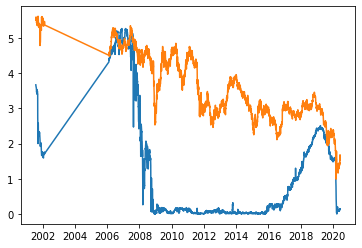

In [56]:
plt.plot(df_treasury_rates[['Treasury 1-Month Rate', 'Treasury 30-Year Rate']])

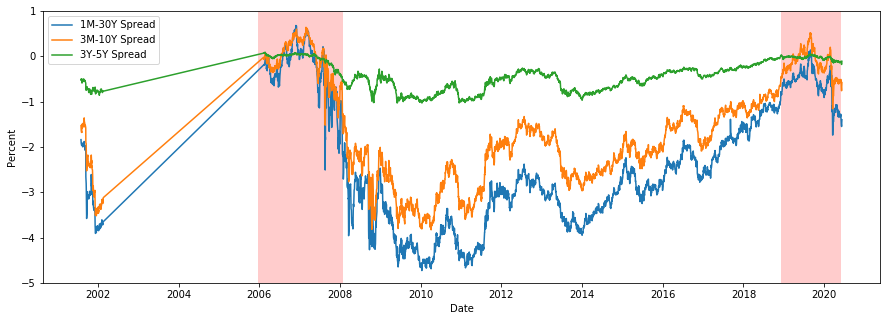

In [57]:
fig = plt.figure(figsize=(15,5))
for c in ['1M-30Y Spread','3M-10Y Spread','3Y-5Y Spread']:
    plt.plot(df_treasury_rates[c], figure=fig,label=c)
plt.vlines(datetime.strptime('2007-01-01', '%Y-%m-%d'),ymin=-5,ymax=1,color='r',lw=85, alpha=0.2)
plt.vlines(datetime.strptime('2019-09-01', '%Y-%m-%d'),ymin=-5,ymax=1,color='r',lw=60, alpha=0.2)
plt.ylim((-5,1))
plt.xlabel('Date')
plt.ylabel('Percent')
plt.legend()

## Calculate Target Returns

In [58]:
def calculate_return(df, days):
    for n in days:
        df['Return T+'+str(n)] = df['Close'].pct_change(n).shift(-n) # numeric variable: return of the stock from this quarter to the next quarter
        df['Moveup T+'+str(n)] = (df['Return T+'+str(n)] > 0).astype(int) # boolean variable: 1 if the stock moves up, 0 otherwise
    return df

In [59]:
df_merged_dly = sf.apply(df=df_share_prices,
                         func=calculate_return,
                         days=range(0,11))
target_returns = ['Return T+'+str(n) for n in range(0,11)]
df_merged_dly['Optimal Return'] = df_merged_dly[target_returns].max(axis=1)
df_merged_dly['Optimal Holding Days'] = df_merged_dly[target_returns].idxmax(axis=1).apply(lambda x: str(x).split('+')[1] if not pd.isna(x) else x)

In [60]:
df_merged_dly['Dividend'] = df_merged_dly['Dividend'].fillna(0)

In [61]:
df_merged_dly = df_merged_dly.dropna()

In [62]:
df_merged_dly

SimFinId    Open       Low    High   Close  Adj. Close  \
Ticker Date                                                                 
A      2007-01-03     45846   34.99   34.0500   35.48   34.30       22.85   
       2007-01-04     45846   34.30   33.4600   34.60   34.41       22.92   
       2007-01-05     45846   34.30   34.0000   34.40   34.09       22.71   
       2007-01-08     45846   33.98   33.6800   34.08   33.97       22.63   
       2007-01-09     45846   34.08   33.6300   34.32   34.01       22.65   
...                     ...     ...       ...     ...     ...         ...   
low    2020-05-08    186050  113.77  112.1000  114.63  114.23      114.23   
       2020-05-11    186050  113.10  112.5733  114.75  113.39      113.39   
       2020-05-12    186050  114.82  111.1800  115.05  111.24      111.24   
       2020-05-13    186050  111.89  108.8100  113.39  110.43      110.43   
       2020-05-14    186050  107.25  106.1972  110.42  110.39      110.39   

                   Dividend   Volume  Return T+0  Moveup T+0  ...  Return T+7  \
Ticker Date                                                   ...               
A      2007-01-03       0.0  2574600         0.0           0  ...   -0.020408   
       2007-01-04       0.0  2073700         0.0           0  ...   -0.025283   
       2007-01-05       0.0  2676600         0.0           0  ...   -0.035788   
       2007-01-08       0.0  1557200         0.0           0  ...   -0.050633   
       2007-01-09       0.0  1386200         0.0           0  ...   -0.035578   
...                     ...      ...         ...         ...  ...         ...   
low    2020-05-08       0.0  3951316         0.0           0  ...    0.023111   
       2020-05-11       0.0  3862234         0.0           0  ...    0.031749   
       2020-05-12       0.0  3682485         0.0           0  ...    0.084502   
       2020-05-13       0.0  6639465         0.0           0  ...    0.107036   
       2020-05-14       0.0  6096776         0.0           0  ...    0.119576   

                   Moveup T+7  Return T+8  Moveup T+8  Return T+9  Moveup T+9  \
Ticker Date                                                                     
A      2007-01-03           0   -0.022157           0   -0.041691           0   
       2007-01-04           0   -0.044754           0   -0.062772           0   
       2007-01-05           0   -0.053975           0   -0.037841           0   
       2007-01-08           0   -0.034442           0   -0.041213           0   
       2007-01-09           0   -0.042340           0   -0.038224           0   
...                       ...         ...         ...         ...         ...   
low    2020-05-08           1    0.024162           1    0.056115           1   
       2020-05-11           1    0.063939           1    0.078137           1   
       2020-05-12           1    0.098975           1    0.111021           1   
       2020-05-13           1    0.119171           1    0.159196           1   
       2020-05-14           1    0.159616           1    0.160612           1   

                   Return T+10  Moveup T+10  Optimal Return  \
Ticker Date                                                   
A      2007-01-03    -0.059767            0        0.003207   
       2007-01-04    -0.046789            0        0.000000   
       2007-01-05    -0.044588            0        0.000000   
       2007-01-08    -0.037092            0        0.001178   
       2007-01-09    -0.041164            0        0.000000   
...                        ...          ...             ...   
low    2020-05-08     0.070209            1        0.070209   
       2020-05-11     0.089955            1        0.089955   
       2020-05-12     0.150755            1        0.150755   
       2020-05-13     0.160192            1        0.160192   
       2020-05-14     0.180813            1        0.180813   

                   Optimal Holding Days  
Ticker Date                              
A    

## Combine daily signals and treasury rates
- **share prices**
- **valuation signals**
- **volume signals**
- **price signals**
- **trade signals**
    - MAVG
    - MACD
- **rsi signals**
    - rsi value
    - shor-term & long-term rsi crossovers
- **treasury rates**

In [63]:
# Merge valuation, volume, price, trade, rsi signals on 'Ticker' and 'Date'
dfs = [df_val_signals,
       df_vol_signals,
       df_price_signals,
       df_mavg_signals, 
       df_macd_signals, 
       df_rsivalue_signals, 
       df_rsi_signals,
       df_treasury_rates,
       df_merged_dly]
df_merged_dly = reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True,how='inner'), dfs)
df_merged_dly = df_merged_dly.reset_index()

In [64]:
df_merged_dly

,Ticker,Date,Dividend Yield,Earnings Yield,FCF Yield,Market-Cap,P/Book,P/Cash,P/E,P/FCF,...,Return T+7,Moveup T+7,Return T+8,Moveup T+8,Return T+9,Moveup T+9,Return T+10,Moveup T+10,Optimal Return,Optimal Holding Days
0,A,2011-08-26,-0.000000,0.071998,0.065607,1.236142e+10,3.120781,4.155097,13.889230,15.242189,...,0.023516,1,-0.020935,0,-0.043304,0,-0.041870,0,0.057356,3
1,A,2011-08-29,-0.000000,0.068371,0.062302,1.301724e+10,3.286352,4.375543,14.626112,16.050851,...,-0.070261,0,-0.091503,0,-0.090142,0,-0.052832,0,0.004085,2
2,A,2011-08-30,-0.000000,0.068558,0.062472,1.298179e+10,3.277402,4.363627,14.586281,16.007139,...,-0.089022,0,-0.087657,0,-0.050246,0,-0.001092,0,0.006827,1
3,A,2011-08-31,-0.000000,0.068093,0.062049,1.307042e+10,3.299777,4.393417,14.685860,16.116418,...,-0.093843,0,-0.056686,0,-0.007865,0,0.004611,1,0.004611,10
4,A,2011-09-01,-0.000000,0.070050,0.063832,1.270528e+10,3.207594,4.270682,14.275596,15.666190,...,-0.029576,0,0.020647,1,0.033482,1,0.014509,1,0.033482,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972824,low,2020-05-08,0.017592,0.032782,0.026110,8.992757e+10,36.585666,97.641224,30.504602,38.299645,...,0.023111,1,0.024162,1,0.056115,1,0.070209,1,0.070209,10
2972825,low,2020-05-11,0.017722,0.033025,0.026303,8.926628e+10,36.316630,96.923211,30.280284,38.018006,...,0.031749,1,0.063939,1,0.078137,1,0.089955,1,0.089955,10
2972826,low,2020-05-12,0.018065,0.033663,0.026812,8.757369e+10,35.628027,95.085440,29.706136,37.297142,...,0.084502,1,0.098975,1,0.111021,1,0.150755,1,0.150755,10
2972827,low,2020-05-13,0.018197,0.033910,0.027008,8.693602e+10,35.368599,94.393070,29.489830,37.025561,...,0.107036,1,0.119171,1,0.159196,1,0.160192,1,0.160192,10


In [65]:
# Merge with general infomation dataset
df_merged_dly = pd.merge(df_info,
                         df_merged_dly,
                         on='SimFinId',
                         how='right')

In [66]:
df_merged_dly = df_merged_dly[list(df_merged_dly.columns)[3:]]

In [67]:
# Check missing values in each column
df_merged_dly_na = (df_merged_dly.isnull().sum() / len(df_merged_dly)) * 100
df_merged_dly_na = df_merged_dly_na.drop(df_merged_dly_na[df_merged_dly_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_merged_dly_na})
missing_data.head(10)

,Missing Ratio
Industry,2.317187
Sector,2.317187
P/Sales,1.451748
P/Cash,0.119146


In [68]:
# Drop stocks with NaN on the column 'Sector' or 'Industry'
_rows_before = len(df_merged_dly)
df_merged_dly = df_merged_dly.dropna(subset=['Sector', 'Industry'])
_rows_after = len(df_merged_dly)
print('i) Number of rows dropped:', _rows_before-_rows_after)

# Drop negative infinity and infinity values
_rows_before = len(df_merged_dly)
df_merged_dly = df_merged_dly.replace([np.inf, -np.inf], np.nan)
_rows_after = len(df_merged_dly)
print('ii) Number of rows dropped:', _rows_before-_rows_after)

# Fill NaN by the sector median
for col in ['P/Sales', 'P/Cash']:
    df_merged_dly[col] = df_merged_dly.groupby(['Sector', 'Date'])[col].apply(lambda x: x.fillna(x.median())) 
                                                    # group by 'Secotr' and 'Report Y-M' # fill the NaN value by the group mean
    
# For the remaining NaN values, just drop the row
_rows_before = len(df_merged_dly)
df_merged_dly = df_merged_dly.dropna().reset_index(drop=True) 
_rows_after = len(df_merged_dly)
print('iii) Number of rows dropped:', _rows_before-_rows_after)

i) Number of rows dropped: 68886
ii) Number of rows dropped: 0
iii) Number of rows dropped: 12880


In [69]:
df_merged_dly_na = (df_merged_dly.isnull().sum() / len(df_merged_dly)) * 100
df_merged_dly_na = df_merged_dly_na.drop(df_merged_dly_na[df_merged_dly_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_merged_dly_na})
missing_data.head(10)

,Missing Ratio


In [70]:
# Convert categorical variable 'Sector' to binary variables using one-hot-encoding
enc = OneHotEncoder(handle_unknown='ignore')
x_sector_df = pd.DataFrame(enc.fit_transform(df_merged_dly[['Sector']]).toarray())
x_sector_df.columns = enc.get_feature_names()
x_sector_df

,x0_Basic Materials,x0_Business Services,x0_Consumer Cyclical,x0_Consumer Defensive,x0_Energy,x0_Financial Services,x0_Healthcare,x0_Industrials,x0_Other,x0_Real Estate,x0_Technology,x0_Utilities
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2891058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2891059,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2891060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2891061,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df_merged_dly = pd.concat([df_merged_dly, x_sector_df], axis=1)
df_merged_dly

,Sector,Industry,Ticker,Date,Dividend Yield,Earnings Yield,FCF Yield,Market-Cap,P/Book,P/Cash,...,x0_Consumer Cyclical,x0_Consumer Defensive,x0_Energy,x0_Financial Services,x0_Healthcare,x0_Industrials,x0_Other,x0_Real Estate,x0_Technology,x0_Utilities
0,Healthcare,Medical Diagnostics & Research,A,2011-08-26,-0.000000,0.071998,0.065607,1.236142e+10,3.120781,4.155097,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Healthcare,Medical Diagnostics & Research,A,2011-08-29,-0.000000,0.068371,0.062302,1.301724e+10,3.286352,4.375543,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Healthcare,Medical Diagnostics & Research,A,2011-08-30,-0.000000,0.068558,0.062472,1.298179e+10,3.277402,4.363627,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Healthcare,Medical Diagnostics & Research,A,2011-08-31,-0.000000,0.068093,0.062049,1.307042e+10,3.299777,4.393417,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Healthcare,Medical Diagnostics & Research,A,2011-09-01,-0.000000,0.070050,0.063832,1.270528e+10,3.207594,4.270682,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891058,Consumer Cyclical,Retail - Apparel & Specialty,low,2020-05-08,0.017592,0.032782,0.026110,8.992757e+10,36.585666,97.641224,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2891059,Consumer Cyclical,Retail - Apparel & Specialty,low,2020-05-11,0.017722,0.033025,0.026303,8.926628e+10,36.316630,96.923211,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2891060,Consumer Cyclical,Retail - Apparel & Specialty,low,2020-05-12,0.018065,0.033663,0.026812,8.757369e+10,35.628027,95.085440,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2891061,Consumer Cyclical,Retail - Apparel & Specialty,low,2020-05-13,0.018197,0.033910,0.027008,8.693602e+10,35.368599,94.393070,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
columns = list(df_merged_dly.columns)
_columns = []
_columns.extend(columns[:4])
_columns.extend(df_merged_dly.columns[columns.index('Open'):])
_columns.extend(df_merged_dly.columns[4:columns.index('Open')])
assert set(columns) == set(_columns)

In [73]:
df_merged_dly = df_merged_dly[_columns]
df_merged_dly

,Sector,Industry,Ticker,Date,Open,Low,High,Close,Adj. Close,Dividend,...,Treasury 6-Month Rate,Treasury 1-Year Rate,Treasury 3-Year Rate,Treasury 5-Year Rate,Treasury 10-Year Rate,Treasury 20-Year Rate,Treasury 30-Year Rate,1M-30Y Spread,3M-10Y Spread,3Y-5Y Spread
0,Healthcare,Medical Diagnostics & Research,A,2011-08-26,32.64,32.1122,34.9487,34.87,23.23,0.0,...,0.03,0.10,0.37,0.98,2.23,3.17,3.60,-3.59,-2.22,-0.61
1,Healthcare,Medical Diagnostics & Research,A,2011-08-29,35.44,35.2500,36.8600,36.72,24.46,0.0,...,0.02,0.09,0.33,0.94,2.19,3.13,3.54,-3.54,-2.18,-0.61
2,Healthcare,Medical Diagnostics & Research,A,2011-08-30,36.48,35.8750,37.0800,36.62,24.39,0.0,...,0.05,0.09,0.35,0.99,2.28,3.22,3.63,-3.63,-2.26,-0.64
3,Healthcare,Medical Diagnostics & Research,A,2011-08-31,36.76,36.4500,38.0600,36.87,24.56,0.0,...,0.05,0.09,0.33,0.94,2.19,3.12,3.53,-3.52,-2.18,-0.61
4,Healthcare,Medical Diagnostics & Research,A,2011-09-01,36.80,35.6700,37.3500,35.84,23.87,0.0,...,0.05,0.10,0.33,0.96,2.23,3.19,3.60,-3.59,-2.21,-0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891058,Consumer Cyclical,Retail - Apparel & Specialty,low,2020-05-08,113.77,112.1000,114.6300,114.23,114.23,0.0,...,0.14,0.15,0.19,0.29,0.63,1.05,1.31,-1.21,-0.52,-0.10
2891059,Consumer Cyclical,Retail - Apparel & Specialty,low,2020-05-11,113.10,112.5733,114.7500,113.39,113.39,0.0,...,0.15,0.15,0.21,0.33,0.69,1.12,1.39,-1.29,-0.57,-0.12
2891060,Consumer Cyclical,Retail - Apparel & Specialty,low,2020-05-12,114.82,111.1800,115.0500,111.24,111.24,0.0,...,0.16,0.16,0.24,0.36,0.73,1.16,1.43,-1.34,-0.61,-0.12
2891061,Consumer Cyclical,Retail - Apparel & Specialty,low,2020-05-13,111.89,108.8100,113.3900,110.43,110.43,0.0,...,0.16,0.16,0.22,0.34,0.69,1.11,1.38,-1.28,-0.56,-0.12


In [ ]:
df_merged_dly.to_csv('merged daily data.csv')